# 如何绘制地理图

Jul 23, 2024

## GeoPandas库

`GeoPandas` 是一个用于处理地理空间数据的 Python 库，扩展了 Pandas 的功能以支持地理信息系统 (GIS) 数据。它使得空间数据的操作和分析变得更加直观和便捷。

## 生成带有城市标记的全球地图

下面使用GeoPandas 和 Matplotlib 生成一个带有城市标记的全球地图

In [1]:
import pandas as pd
import numpy as np
list_df = pd.read_excel('NationsGEO.xlsx',
                        index_col='国家缩写')

In [2]:
list_df.head(1)

,区域,国家全称EN,国家全称,国家（地区）,城市英文名,经纬度,指数编码,指数名称
国家缩写,,,,,,,,
US,美洲,America,UNITED STATES,美国,New York,"经纬度：-73.86483 , 40.84478",S&P500,标普500


In [3]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

首先，通过 `geopandas.read_file` 读取了地理数据文件，并将地图绘制在一个 10x10 英寸的区域内，地图的颜色为灰色且具有一定透明度。

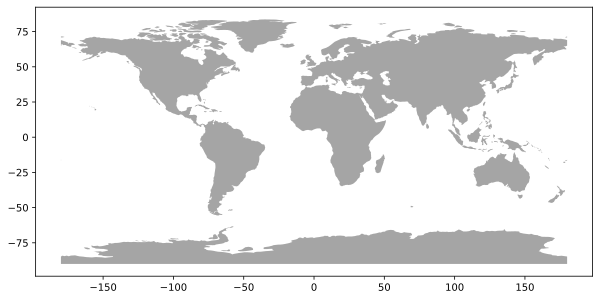

In [4]:
import geopandas
import geodatasets
df = geopandas.read_file(geodatasets.get_path("naturalearth.land"))
ax = df.plot(figsize=(10,10), color='grey', alpha=0.7, )

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size":6
})

然后，从数据集中提取了城市的经纬度和英文名称，并在地图上用红色方形标记这些城市的位置。对于欧洲的城市，地图上隐藏了城市名称。

最后，隐藏了坐标轴的刻度以清理地图视图，虽然坐标轴范围的设置被注释掉了，但可以用来调整地图的显示范围。

([], [])

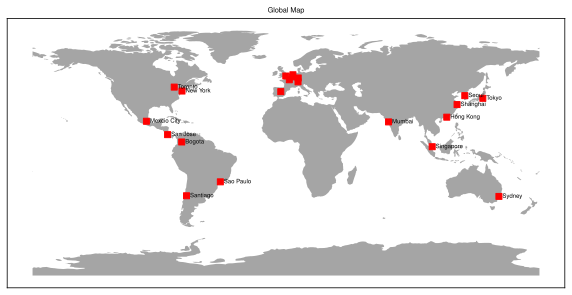

In [6]:
df = geopandas.read_file(geodatasets.get_path("naturalearth.land"))
cm=1/2.54
ax = df.plot(figsize=(10,10), color='grey', alpha=0.7, )

ax.set_title('Global Map')

df = list_df#[list_df['select']=='v']
jw = df['经纬度']
city = df['城市英文名']
for j, i in enumerate(jw):
    lon = float(i.split('经纬度：')[1].split(' , ')[0])
    lat = float(i.split('经纬度：')[1].split(' , ')[1])
    ax.plot(lon, lat, 's',
            color='red',
           label=city.iloc[j])
    if df['区域'].iloc[j] != '欧洲':
        plt.text(lon+2.5, lat-1, city.iloc[j],
               horizontalalignment='left')
#plt.xlim((-15,30))
#plt.ylim((30,70))
plt.xticks([])
plt.yticks([])

([], [])

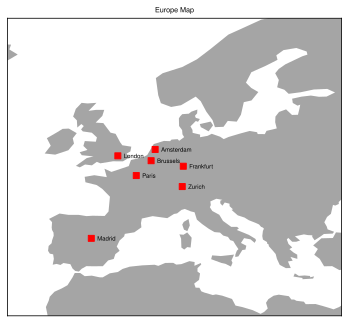

In [7]:
df = geopandas.read_file(geodatasets.get_path("naturalearth.land"))
cm=1/2.54
ax = df.plot(figsize=(6,6), color='grey', alpha=0.7, )


ax.set_title('Europe Map')

df = list_df#[list_df['select']=='v']
df = df[df['区域'] == '欧洲']
jw = df['经纬度']
city = df['城市英文名']
for j, i in enumerate(jw):
    lon = float(i.split('经纬度：')[1].split(' , ')[0])
    lat = float(i.split('经纬度：')[1].split(' , ')[1])
    ax.plot(lon, lat, 's',
            color='red',
           label=city.iloc[j])
    plt.text(lon+0.8, lat-0.3, city.iloc[j],
            horizontalalignment='left')
plt.xlim((-15,30))
plt.ylim((30,70))
plt.xticks([])
plt.yticks([])

Text(0.5, 1.0, 'America Map')

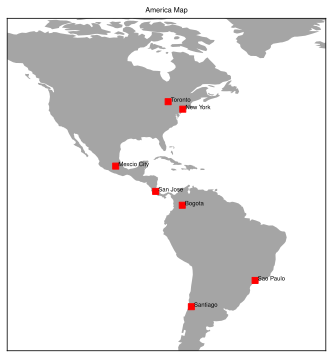

In [8]:
df = geopandas.read_file(geodatasets.get_path("naturalearth.land"))
cm=1/2.54
ax = df.plot(figsize=(6,6), color='grey', alpha=0.7, )


df = list_df#[list_df['select']=='v']
df = df[df['区域'] == '美洲']
jw = df['经纬度']
city = df['城市英文名']
for j, i in enumerate(jw):
    lon = float(i.split('经纬度：')[1].split(' , ')[0])
    lat = float(i.split('经纬度：')[1].split(' , ')[1])
    ax.plot(lon, lat, 's',
            color='red',
           label=city.iloc[j])
    plt.text(lon+1, lat, city.iloc[j],
            horizontalalignment='left')
plt.xlim((-140,-20))
plt.ylim((-50,75))
plt.xticks([])
plt.yticks([])
ax.set_title('America Map')

Text(0.5, 1.0, 'Asia/Pacific Map')

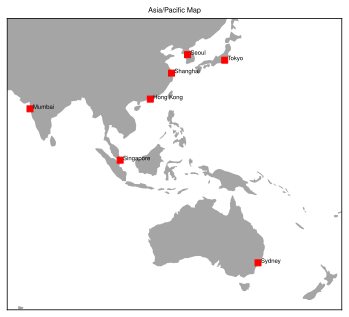

In [9]:
df = geopandas.read_file(geodatasets.get_path("naturalearth.land"))
cm=1/2.54
ax = df.plot(figsize=(6,6), color='grey', alpha=0.7, )


df = list_df#[list_df['select']=='v']
df = df[df['区域'] == '亚太']
jw = df['经纬度']
city = df['城市英文名']
for j, i in enumerate(jw):
    lon = float(i.split('经纬度：')[1].split(' , ')[0])
    lat = float(i.split('经纬度：')[1].split(' , ')[1])
    ax.plot(lon, lat, 's',
            color='red',
           label=city.iloc[j])
    plt.text(lon+1, lat, city.iloc[j],
            horizontalalignment='left')
plt.xlim((65,180))
plt.ylim((-50,50))
plt.xticks([])
plt.yticks([])
ax.set_title('Asia/Pacific Map')